In [1]:
import xgboost as xgb
import sklearn.datasets
import sklearn.metrics
import sklearn.feature_selection
import sklearn.feature_extraction
import sklearn.model_selection
import tqdm
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from xgboost import plot_tree
import graphviz
xgb.__version__

'2.0.3'

In [2]:
df = sklearn.datasets.load_wine()
print(df.keys())
print(df['feature_names'])
print(df['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [3]:
X = df['data']
print(f'X shape = {X.shape}')
y = df['target']
print(f'Y shape = {y.shape}')

X shape = (178, 13)
Y shape = (178,)


In [4]:
x_tr, x_te, y_tr, y_te = sklearn.model_selection.train_test_split(X, y)
print(f'x_tr shape = {x_tr.shape}')
print(f'x_te shape = {x_te.shape}')
print(f'y_tr shape = {y_tr.shape}')
print(f'y_te shape = {y_te.shape}')

x_tr shape = (133, 13)
x_te shape = (45, 13)
y_tr shape = (133,)
y_te shape = (45,)


In [ ]:
one_shot = xgb.train(dict(
    update = 'refresh',
    process_type = 'default',
    refresh_leaf = True,
    verbosity = 0
),dtrain = xgb.DMatrix(x_tr,y_tr))

y_pr = one_shot.predict(xgb.DMatrix(x_te))

sklearn.metrics.mean_squared_error(y_te, y_pr)

In [ ]:
iteration = 5
one_shot_model_itr = None
for i in range(iteration):
    one_shot_model_itr = xgb.train({
        'update':'update',
        'process_type': 'default',
        'refresh_leaf': True,
        'verbosity' :0
    }, dtrain=xgb.DMatrix(x_tr, y_tr), xgb_model=one_shot_model_itr)
    y_pr = one_shot_model_itr.predict(xgb.DMatrix(x_te))
    print('Iteration {}: {}'.format(i, sklearn.metrics.mean_squared_error(y_te, y_pr)))

In [5]:
params = dict(max_depth = 3, learning_rate = 0.1)
mid_point = len(x_tr) // 2
x_tr1 = x_tr[:mid_point]
y_tr1 = y_tr[:mid_point]
x_tr2 = x_tr[mid_point:]
y_tr2 = y_tr[mid_point:]
dtrain0 = xgb.DMatrix(x_tr, y_tr)
dtrain1 = xgb.DMatrix(x_tr1, y_tr1)
dtrain2 = xgb.DMatrix(x_tr2,y_tr2)
dtest = xgb.DMatrix(x_te, label = y_te)

model0 = xgb.train(params, dtrain0, num_boost_round= 10)
model1 = xgb.train(params, dtrain1, num_boost_round= 10)
model2 = xgb.train(params, dtrain2, num_boost_round= 10, xgb_model = model1)

pred0 = model0.predict(dtest)
pred1 = model1.predict(dtest)
pred2 = model2.predict(dtest)
mse0 = sklearn.metrics.mean_squared_error(y_te,pred0)
mse1 = sklearn.metrics.mean_squared_error(y_te,pred1)
mse2 = sklearn.metrics.mean_squared_error(y_te,pred2)

print(f'mse model 0 = {mse0}')
go.Figure([
    go.Scatter( y = pred0, mode = 'markers',),
    go.Scatter( y = y_te, mode = 'lines')
]).show()

print(f'mse model 1 = {mse1}')
go.Figure([
    go.Scatter( y = pred1, mode = 'markers',),
    go.Scatter( y = y_te, mode = 'lines')
]).show()

print(f'mse model 2 = {mse2}')
go.Figure([
    go.Scatter( y = pred2, mode = 'markers',),
    go.Scatter( y = y_te, mode = 'lines')
]).show()

num_trees0 = len(model0.get_dump())
num_trees1 = len(model1.get_dump())
num_trees2 = len(model2.get_dump())
print(f'num_trees0 = {num_trees0}')
print(f'num_trees1 = {num_trees1}')
print(f'num_trees2 = {num_trees2}')

mse model 0 = 0.12786006715733086


mse model 1 = 0.22189922056386815


mse model 2 = 0.1515377476429867


num_trees0 = 10
num_trees1 = 10
num_trees2 = 20


<Figure size 2000x3000 with 0 Axes>

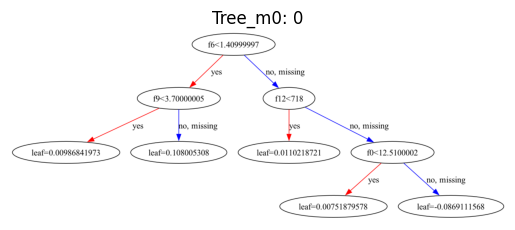

<Figure size 2000x3000 with 0 Axes>

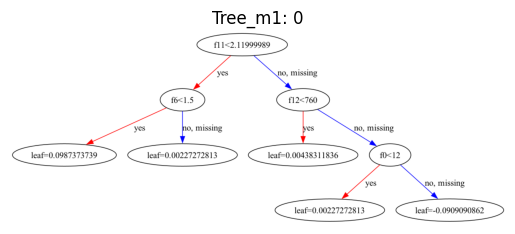

<Figure size 2000x3000 with 0 Axes>

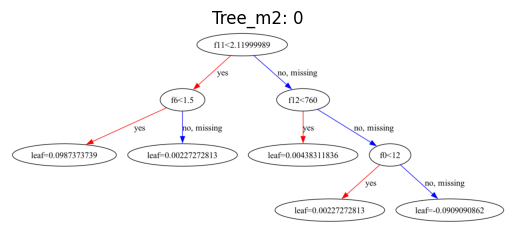

<Figure size 2000x3000 with 0 Axes>

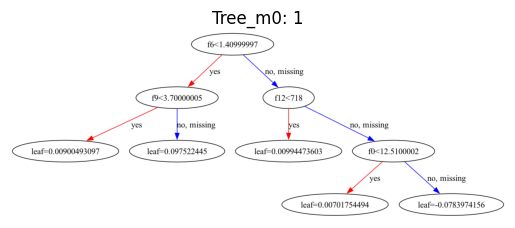

<Figure size 2000x3000 with 0 Axes>

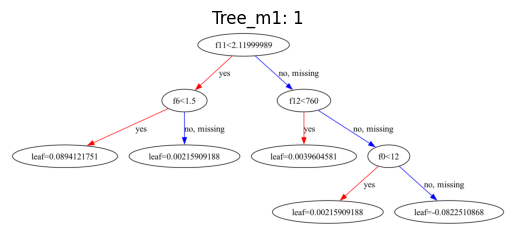

<Figure size 2000x3000 with 0 Axes>

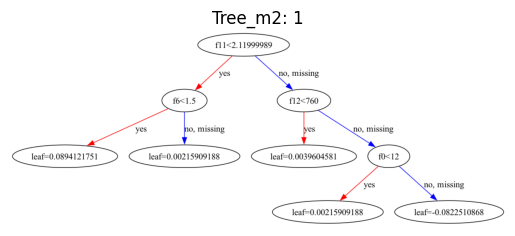

<Figure size 2000x3000 with 0 Axes>

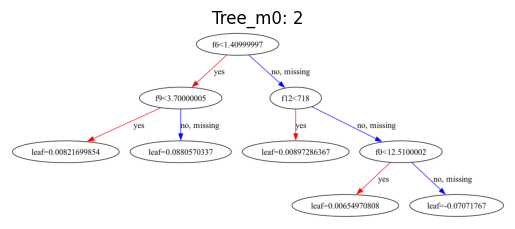

<Figure size 2000x3000 with 0 Axes>

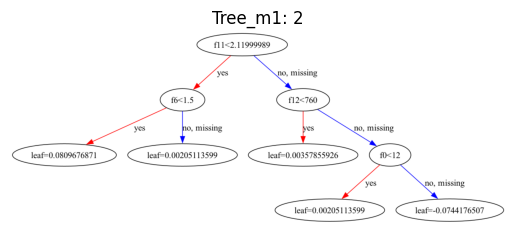

<Figure size 2000x3000 with 0 Axes>

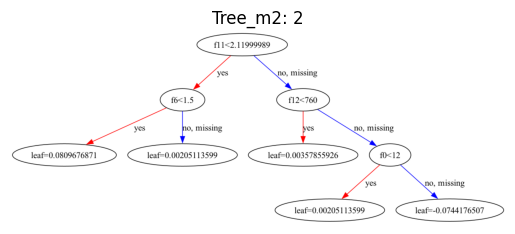

<Figure size 2000x3000 with 0 Axes>

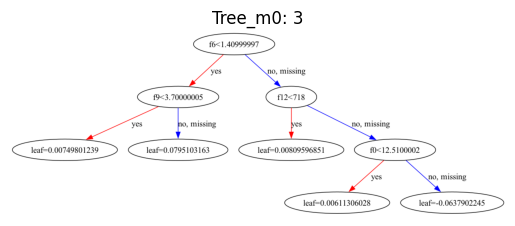

<Figure size 2000x3000 with 0 Axes>

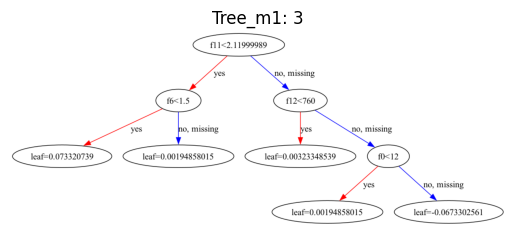

<Figure size 2000x3000 with 0 Axes>

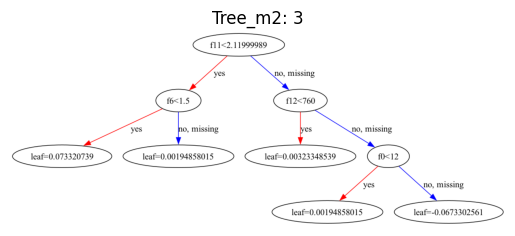

<Figure size 2000x3000 with 0 Axes>

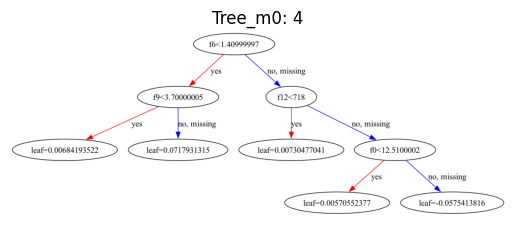

<Figure size 2000x3000 with 0 Axes>

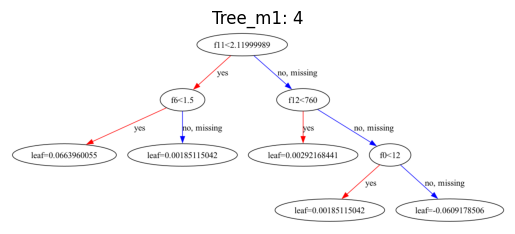

<Figure size 2000x3000 with 0 Axes>

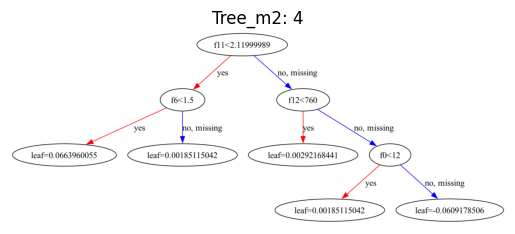

<Figure size 2000x3000 with 0 Axes>

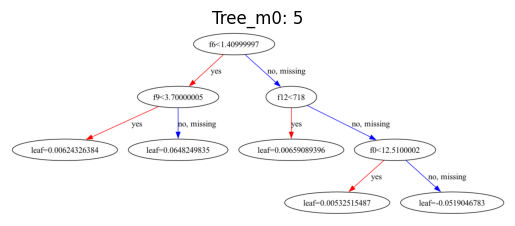

<Figure size 2000x3000 with 0 Axes>

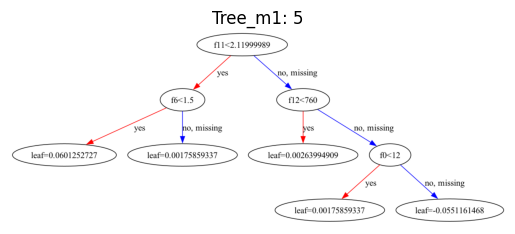

<Figure size 2000x3000 with 0 Axes>

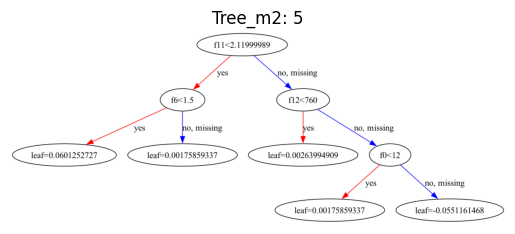

<Figure size 2000x3000 with 0 Axes>

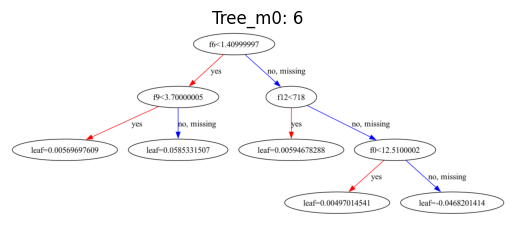

<Figure size 2000x3000 with 0 Axes>

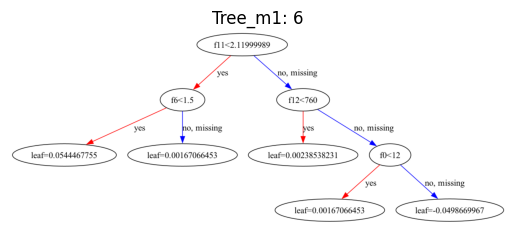

<Figure size 2000x3000 with 0 Axes>

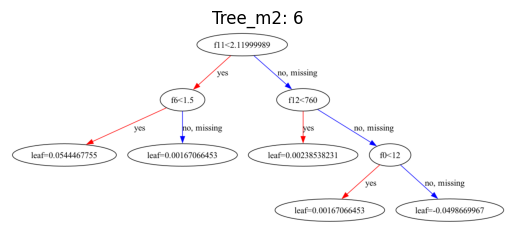

<Figure size 2000x3000 with 0 Axes>

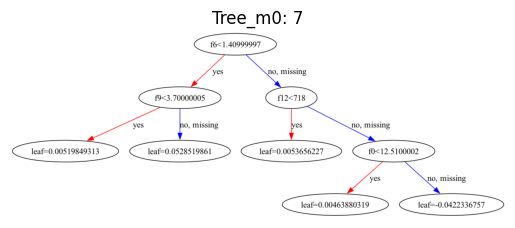

<Figure size 2000x3000 with 0 Axes>

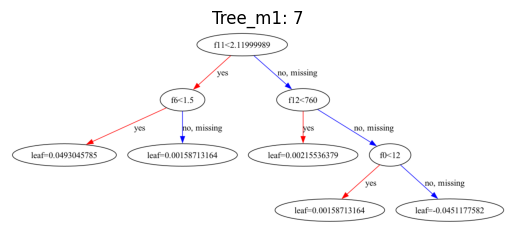

<Figure size 2000x3000 with 0 Axes>

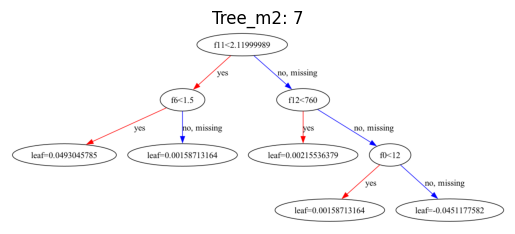

<Figure size 2000x3000 with 0 Axes>

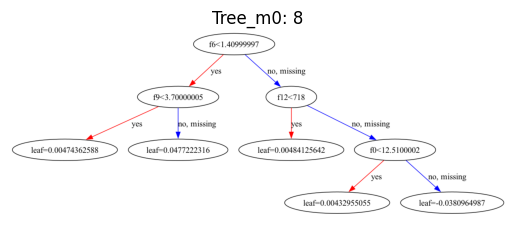

<Figure size 2000x3000 with 0 Axes>

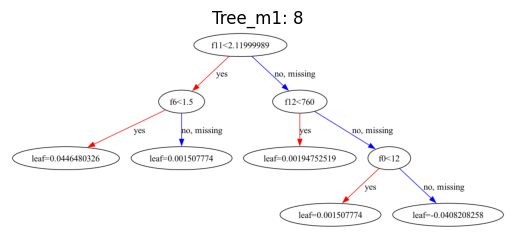

<Figure size 2000x3000 with 0 Axes>

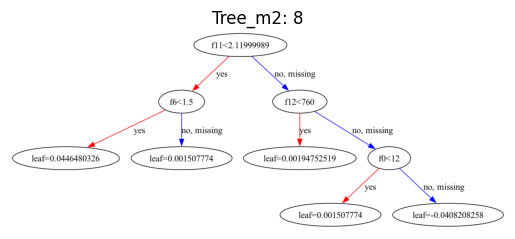

<Figure size 2000x3000 with 0 Axes>

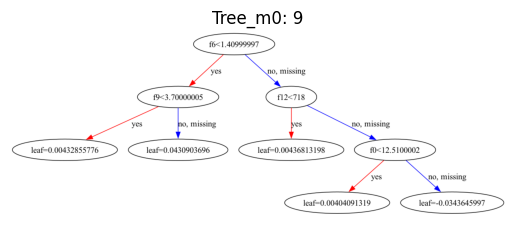

<Figure size 2000x3000 with 0 Axes>

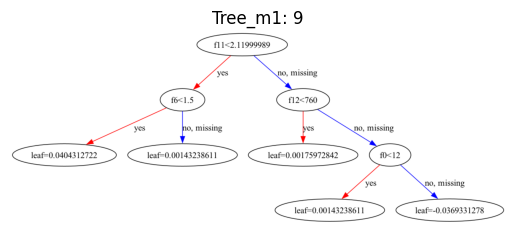

<Figure size 2000x3000 with 0 Axes>

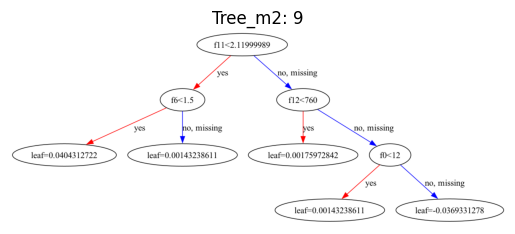

In [14]:
for i in range(num_trees1):
    plt.figure(figsize = [20,30])
    plot_tree(model0, num_trees = i)
    plt.title(f'Tree_m0: {i}')
    plt.show()

    plt.figure(figsize = [20,30])
    plot_tree(model1, num_trees = i)
    plt.title(f'Tree_m1: {i}')
    plt.show()

    plt.figure(figsize = [20,30])
    plot_tree(model2, num_trees = i)
    plt.title(f'Tree_m2: {i}')
    plt.show()